In [4]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime((df['job_posted_date']))
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## Scatter Plot

### Notes

* `scatter()` - create a scatter plot of x vs y.
* Common parameters:
    * `x`, `y` - Column names or positions to plot, typically one column for the x-axis and another for the y-axis.
    * `s` - The size of each point. Can be a single size or an array for varying sizes.
    * `c` - Color of each marker. Can specify a single color or an array to have different colors for each point.
    * `marker` - The style of the marker. You can use markers like o, ^, *, etc.
    * `alpha` - The blending value of the markers, between 0 (transparent) and 1 (opaque).
* Syntax: `plt.scatter(df['x'], df['y'], s=df['size'], c=df['color'], alpha=0.5, marker='o')`
* Scatter plots compare different categories or groups of data.

### Example

Create a scatter plot that plots the count of job postings using `job_skills` for each skill versus their median salary using `salary_year_avg`. The count will be on the x-axis while the salary year median will be on the y-axis. 


In [5]:
df = df[df['job_title_short'] == 'Data Analyst'].copy()

In [6]:
df_exploded = df.explode('job_skills')

df_exploded

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,power bi,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785717,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,NTT DATA DACH,azure,"{'cloud': ['aws', 'azure']}"
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sql,"{'analyst_tools': ['sas', 'excel'], 'programmi..."


In [7]:
skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count = ('job_skills', 'count'),
    median_salary = ('salary_year_avg', 'median')
)

skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(10)


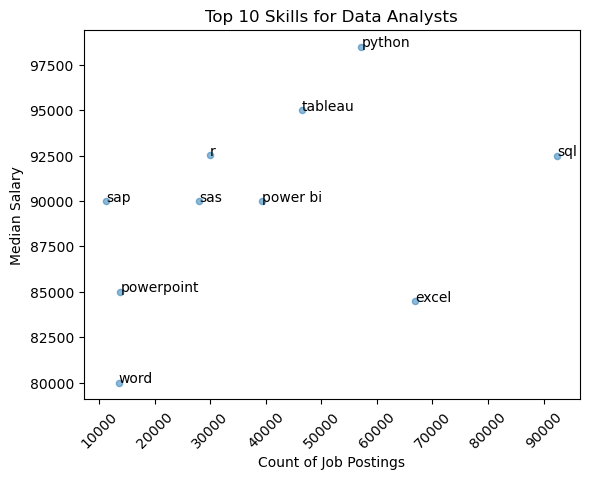

In [8]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary', alpha=0.5, marker='o')
plt.title('Top 10 Skills for Data Analysts')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Salary')
plt.xticks(rotation=45)

for i, txt in enumerate(skill_stats.index):
    plt.annotate(txt, (skill_stats['skill_count'].iat[i], skill_stats['median_salary'].iat[i]))
plt.show()

# Advance Customization

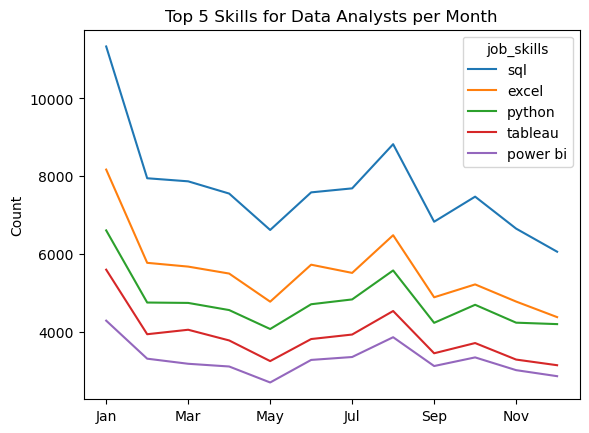

In [9]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()
# create a new column for month number
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

# Explode the job_skills column and pivot
df_DA_explode= df_DA.explode('job_skills')
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', columns='job_skills',  aggfunc='size', fill_value=0)

# sort the skills by count
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop('Total')

# Use month names for plotting
df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot = df_DA_pivot.drop(columns='job_posted_month_no')

# Get the top 5 skills
df_DA_pivot.iloc[:, :5].plot(kind='line')

plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

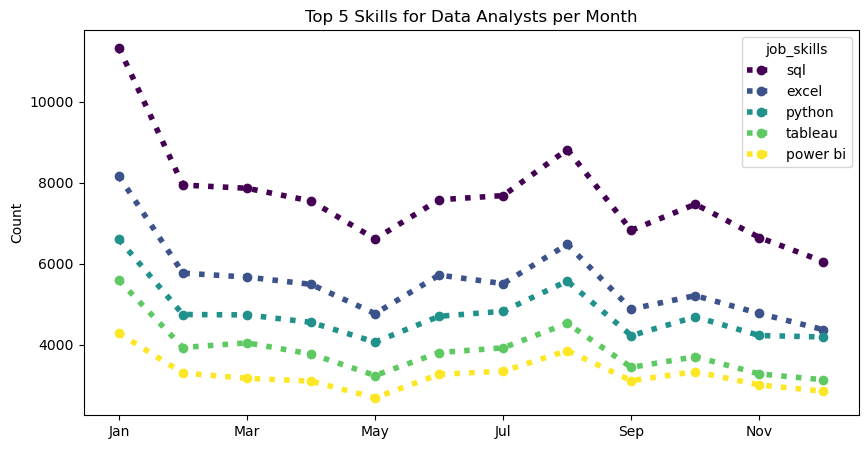

In [10]:
# Get the top 5 skills
df_DA_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=4,
    colormap='viridis',
    linestyle=':', # options: '-', '--', '-.', ':'
    marker='o', # options: 'o', '^', 's', 'd', 'x',
    figsize=(10, 5),
)

plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

## Customizing our Scatter plot from `15_Scatter_Plot.ipynb`

Let's now customize the scatter plot from the last exercise.

In [11]:
# Explode the 'job_skills' into individual rows
df_exploded = df_DA.explode('job_skills')

# Calculate the average salary and count of job postings per skill
skill_stats = df_exploded.groupby('job_skills').agg(
    median_salary=('salary_year_avg', 'median'),
    skill_count=('job_skills', 'count')
)

# Limit to the top skills
skill_count = 20
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(skill_count)

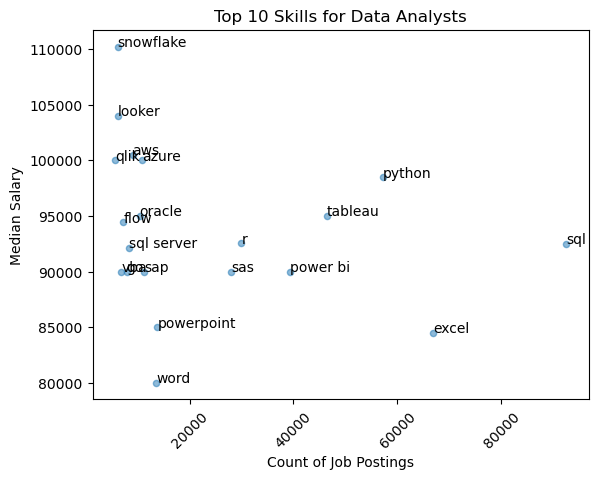

In [12]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary', alpha=0.5, marker='o')
plt.title('Top 10 Skills for Data Analysts')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Salary')
plt.xticks(rotation=45)

for i, txt in enumerate(skill_stats.index):
    plt.annotate(txt, (skill_stats['skill_count'].iat[i], skill_stats['median_salary'].iat[i]))
    
plt.show()

# Historgrams

## Notes

### Plotting 

* `hist()`: plot a histogram.
* Common Parameters:
    * `x` - the data you want to plot
    * `bins` - the number of bins or bin edges
    * `range` - lower and upper range of the bins 
* Syntax: `hist(x, bins=None, range=None)`

### General Info

* Purpose: 
    * Understanding the distribution of continuous numerical data by showing the frequency of data points within certain range or intervals (bins). 
    * It can help reveal patterns like skewness, bimodality or normal distribution. 
* Description: It's divided into equal-sized bins or intervals along the x-axis, and the height of each bar represents the frequency or count of data points falling within that bin range. 
* Difference between bar charts:
    * Histograms displays continuous numerical data, bar charts represent categorical or discrete data. 
    * X-axis on histogram represents the bins of the continuous variable, while a bar chart represents the discrete categories. 
    * Histograms are used to visualize the distribution and frequency of a single continuous variable; bar charts are used to compare values or frequencies across different categories. 

## Example 

Let's create a histogram to show the distribution of yearly salaries (`salary_year_avg`) for data analyst positions.

First, we're only going to include Data Analyst job postings, then remove any entries without a specified average yearly salary (NaN values), and create the histogram using `hist()`.  

In [13]:
# Only get data analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

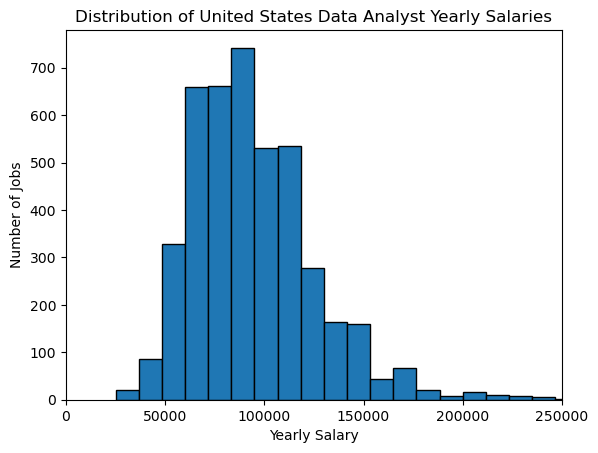

In [23]:
# Plot histogram for yearly average salary


df_DA_US['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='black')
# Alternatively, with matplotlib
# plt.hist(df_DA_US['salary_year_avg'], bins=30, edgecolor='black')

plt.xlim(0, 250000)
plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.show()

# Matplotlib Box Plots

## Notes

### General 

* `boxplot()`: plot a box plot
* Common Parameters:
    * `column` - column(s) to plot
    * `by` - if specified, data will be grouped and a box plot for each group will be plotted
    * `vert` - if False, plots horizontal boxplots
* * Syntax: `boxplot(column=['column1', 'column2', ...], by=None, vert=False)`

### General Info

* Purpose:
    * Visualize the distribution of a dataset by displaying the summary statistics (minimum, first quartile, median, third quartile, and maximum).
    * Identify outliers and skewness in the data.
    * Compare distributions across multiple groups.

* Description: A box plot consists of a box representing the interquartile range (IQR), a line inside the box representing the median, and whiskers extending from the box to the minimum and maximum values within 1.5 times the IQR. Outliers beyond this range are plotted as individual points.
* Interpretation:
    * Box height represents the IQR (middle 50% of data).
    * Median line divides the box into the 25th and 75th percentiles.
    * Whiskers show the range of non-outlier data points.
    * Outliers are plotted as individual points beyond the whiskers.

### Advantages

* Compact visualization of key summary statistics.
* Easy to compare distributions across multiple groups.
* Identifies skewness and outliers in the data.

## Example 1

 Create a box plot to see the distribution of `salary_year_avg` for the DataFrame.

In [24]:
# Only get data analyst jobs 
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the column for plotting
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

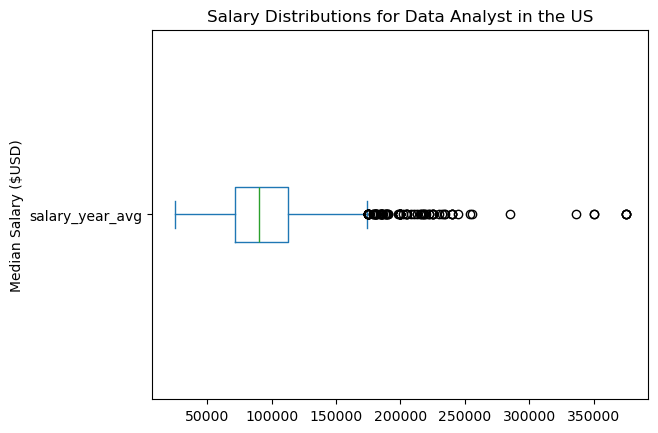

In [25]:
df_DA_US['salary_year_avg'].plot(kind='box', vert=False)
# Alternatively, you can use matplotlib
# plt.boxplot(df_DA_US['salary_year_avg'])

plt.title('Salary Distributions for Data Analyst in the US')
plt.ylabel('Median Salary ($USD)')
plt.show()

### Interpretation

* Median Salary: The green line in the box indicates the median salary, which appears to be around $100,000.
* Interquartile Range (IQR): The box itself spans from approximately $65,000 (lower quartile) to $125,000 (upper quartile). This range represents the middle 50% of the salary data.
* Whiskers: The lines extending from the box (whiskers) suggest the range of typical salaries beyond the IQR. The lower whisker extends to about $50,000, indicating the minimum typical salary. The upper whisker goes up to about $175,000, suggesting the maximum typical salary before considering outliers.
* Outliers: Salaries represented by dots above the upper whisker are considered outliers. There are several outliers ranging up to approximately $350,000, indicating salaries that are unusually high compared to the general distribution.

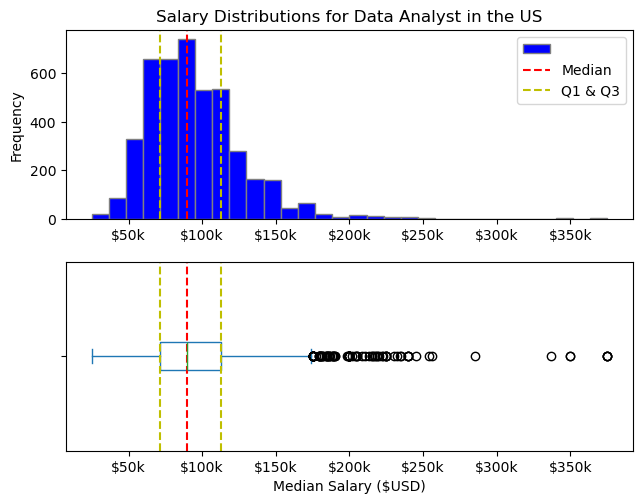

In [30]:
fig, ax = plt.subplots(2, 1)
fig.tight_layout(h_pad=1)

df_DA_US['salary_year_avg'].plot(kind='hist', color='blue', ax=ax[0], bins=30, edgecolor='gray')
ax[0].set_title('Salary Distributions for Data Analyst in the US')
ax[0].set_xlabel('')
ax[0].set_ylabel('Frequency')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '${0:g}k'.format(x/1000)))
# lines
ax[0].axvline(df_DA_US['salary_year_avg'].median(), color='r', linestyle='--')
ax[0].axvline(df_DA_US['salary_year_avg'].quantile(0.25), color='y', linestyle='--')
ax[0].axvline(df_DA_US['salary_year_avg'].quantile(0.75), color='y', linestyle='--')
ax[0].legend(['', 'Median', 'Q1 & Q3'])


df_DA_US['salary_year_avg'].plot(kind='box', ax=ax[1], vert=False)
ax[1].set_yticklabels('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '${0:g}k'.format(x/1000)))
# lines
ax[1].axvline(df_DA_US['salary_year_avg'].median(), color='r', linestyle='--')
ax[1].axvline(df_DA_US['salary_year_avg'].quantile(0.25), color='y', linestyle='--')
ax[1].axvline(df_DA_US['salary_year_avg'].quantile(0.75), color='y', linestyle='--')
plt.show()